In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_generator import Datagen
from feedforward_network import FeedForwardNet
from residual_network import ResidualNet
from terminal_unicycle import FeedforwardUnicycle, ResidualUnicycle
from ddp_solver import solve_problem
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils import plot_trajectories

In [3]:
fnet1 = torch.load('./Fnet/net1.pth')
fnet5 = torch.load('./Fnet/net5.pth')
fnet10 = torch.load('./Fnet/net10.pth')
fnet17 = torch.load('./Fnet/net17.pth')
fnet30 = torch.load('./Fnet/net30.pth')
fnet50 = torch.load('./Fnet/net50.pth')


rnet1 = torch.load('./Rnet/net1.pth')
rnet5 = torch.load('./Rnet/net5.pth')
rnet10 = torch.load('./Rnet/net10.pth')
rnet17 = torch.load('./Rnet/net17.pth')
rnet30 = torch.load('./Rnet/net30.pth')
rnet50 = torch.load('./Rnet/net50.pth')


In [4]:
data = Datagen.circular_data()

def trajectories(net, dataset):
    traj = []
    cost = []
    iters = []
    for data in dataset:
        terminal_model = FeedforwardUnicycle(net)
        ddp = solve_problem(terminal_model=terminal_model, initial_configuration=data, precision=1e-5)
        xs_ = np.array(ddp.xs)
        xs  = xs_[:,0:2]
        traj.append(xs)
        cost.append(ddp.cost)
        iters.append(ddp.iter)
    return traj, cost, iters

def trajectories_r(net, dataset):
    traj = []
    cost = []
    iters = []
    for data in dataset:
        terminal_model = ResidualUnicycle(net)
        ddp = solve_problem(terminal_model=terminal_model, initial_configuration=data, precision=1e-5)
        xs_ = np.array(ddp.xs)
        xs  = xs_[:,0:2]
        traj.append(xs)
        cost.append(ddp.cost)
        iters.append(ddp.iter)
    return traj, cost, iters

x1f, v1f, i1f = trajectories(fnet1, data)
x5f, v5f, i5f = trajectories(fnet5, data)
x10f, v10f, i10f = trajectories(fnet10, data)
x17f, v17f, i17f = trajectories(fnet17, data)
x30f, v30f, i30f = trajectories(fnet30, data)
x50f, v50f, i50f = trajectories(fnet50, data)


 Returning [100] points from the circumference of a circle of radii [2]


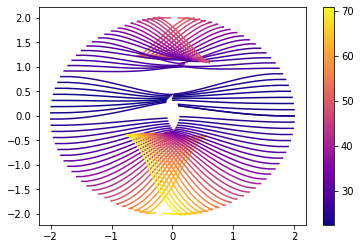

In [9]:
plot_trajectories(value=v30f, xs=x30f)